## Chirp 2.

We construct chirp data with some gaussian noise.

We want to fit a smooth model to the data: SplinesDynamicModel with unknown knot number and locations.

Demonstration:
1. Modifiable, Dynamic SplinesModel
2. NestedSampler 
3. EvidenceProblem
4. ModelDistribution

In [1]:
import numpy as numpy
import math

from astropy.io import ascii

from BayesicFitting import ModelDistribution
from BayesicFitting import EvidenceProblem
from BayesicFitting import NestedSampler
from BayesicFitting import formatter as fmt
from BayesicFitting import plotFit
from BayesicFitting import Tools
import matplotlib.pyplot as plt

from BayesicFitting import SplinesDynamicModel

In [2]:
#%matplotlib osx
%matplotlib inline

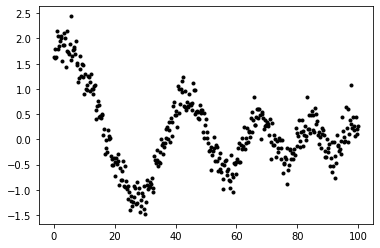

In [3]:
npt = 401
t = numpy.linspace( 0, 100, npt, dtype=float )
ym = 2 * numpy.sin( 2 * math.pi * numpy.exp( t / 60 ) +1 ) * numpy.exp( -0.02 * t )
y = numpy.random.seed( 12345 )
y = ym + numpy.random.randn( npt ) * 0.2
plt.plot( t, y, 'k.' )
plt.show()

In [4]:
knots =[0, 25, 50, 75, 100]
mxk = 15
mdl = SplinesDynamicModel( knots=knots, dynamic=True, maxKnots=mxk, minKnots=4, minDistance=0.03 )
mdl.setLimits( lowLimits=[-10.0], highLimits=[+10.0] )

ep = EvidenceProblem( model=mdl, xdata=t, ydata=y )

Fit all parameters of
  DynModBasicSplines of order 3 with 5 knots.
Using a ModelDistribution with unknown scale
Moving the walkers with   BirthEngine  DeathEngine  StructureEngine
Iteration     logZ        H       LowL     npar parameters                                   scale
       0      -304.      4.6      -299.      9  [    2.114    1.702   -2.157    1.291 ...    0.472]


     100      -162.      4.6      -156.     10  [    1.776    1.518    3.157   -3.612 ...    0.325]


     200      -111.      4.6      -105.     14  [    1.716    2.026    1.972    1.182 ...    0.275]


     300      -69.5      5.5      -63.2     14  [    1.724    2.789   -1.774   -0.867 ...    0.247]


     400      -43.3      5.9      -36.6     15  [    1.733    2.832   -3.216    0.056 ...    0.228]


     500      -29.5      6.3      -22.4     15  [    1.882    1.877    1.303   -2.643 ...    0.220]


     600      -18.3      7.2      -10.1     14  [    1.807    2.158    0.943   -1.457 ...    0.215]


     700      -11.8      7.4      -3.22     14  [    1.797    2.031    1.399   -1.386 ...    0.211]


     800      -7.77      7.9       1.15     15  [    1.741    2.764   -2.220   -0.844 ...    0.207]


     900      -5.75      8.2       3.66     15  [    1.748    2.264    0.349   -2.295 ...    0.206]


    1000      -4.38      8.7       5.85     13  [    1.804    2.650   -3.733    1.656 ...    0.209]


    1100      -3.13      9.5       8.02     14  [    1.772    1.910    1.866   -3.340 ...    0.206]


    1200      -2.05     10.2       9.85     13  [    1.724    2.846   -3.847    2.804 ...    0.207]


    1300      -1.29     10.8       11.3     13  [    1.735    2.668   -1.148   -1.164 ...    0.206]


    1400     -0.680     11.4       12.7     13  [    1.761    2.756   -3.895    1.705 ...    0.205]


    1500     -0.237     11.8       13.7     13  [    1.735    2.594   -0.894   -1.336 ...    0.204]


    1600     0.0547     12.2       14.6     12  [    1.706    2.907   -3.970    2.313 ...    0.206]


    1700      0.262     12.5       15.6     12  [    1.760    2.762   -3.900    2.451 ...    0.205]


    1800      0.423     12.8       16.5     12  [    1.755    2.743   -4.056    2.411 ...    0.205]


    1900      0.551     13.2       17.3     12  [    1.721    2.836   -4.079    2.509 ...    0.205]


    2000      0.642     13.4       18.1     12  [    1.727    2.816   -3.989    2.823 ...    0.204]


    2100      0.708     13.6       18.8     12  [    1.730    2.830   -3.905    2.739 ...    0.204]


    2200      0.753     13.8       19.4     12  [    1.750    2.794   -3.847    2.577 ...    0.203]


    2300      0.781     13.9       19.9     12  [    1.710    2.880   -3.958    2.527 ...    0.203]


    2400      0.797     14.0       20.3     12  [    1.691    2.918   -3.970    2.539 ...    0.203]


    2500      0.805     14.0       20.6     12  [    1.733    2.828   -3.915    2.556 ...    0.203]


    2600      0.809     14.0       20.9     12  [    1.723    2.840   -3.946    2.554 ...    0.203]


    2700      0.811     14.0       21.2     12  [    1.715    2.854   -4.045    2.449 ...    0.203]


    2799      0.812     14.0       21.4     12 
Parameters   [    1.717    2.854   -3.995    2.487   -1.990    1.357   -1.291    1.156   -1.232    0.957    0.086
                  0.202]
Engines              success     reject     failed       best      calls
BirthEngine              790      29832       4923          0      10930
DeathEngine              686       4472       5772          0      10930
StructureEngine        30835          0      53721          0      10930
Calls to LogL         115142
Samples        2899
Evidence         0.353 +-      0.163


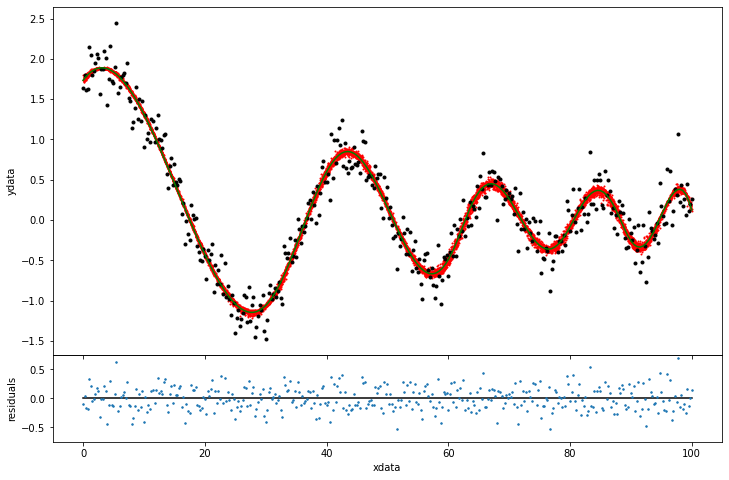

In [5]:
distr = ModelDistribution( limits=[0.01,1] )

ns = NestedSampler( problem=ep, distribution=distr )

ns.verbose = 2

evid = ns.sample( plot=True )



In [6]:
sl = ns.samples
kmed = sl.getMedianIndex()
smpl = sl[kmed]
print( fmt( smpl.model.knots, max=None ) )
print( fmt( smpl.model.parameters, max=None ) )
print( fmt( sl[-1].model.knots, max=None ) )
print( fmt( sl[-1].model.parameters, max=None ) )

[    0.000   30.154   43.456   60.892   62.990   78.095   86.750   87.630   92.216  100.000]
[    1.713    2.857   -3.999    2.749   -1.842    1.363   -1.608    0.808   -0.154   -0.779    0.874    0.111]
[    0.000   30.528   43.115   58.463   66.836   76.418   85.541   92.152  100.000]
[    1.717    2.854   -3.995    2.487   -1.990    1.357   -1.291    1.156   -1.232    0.957    0.086]


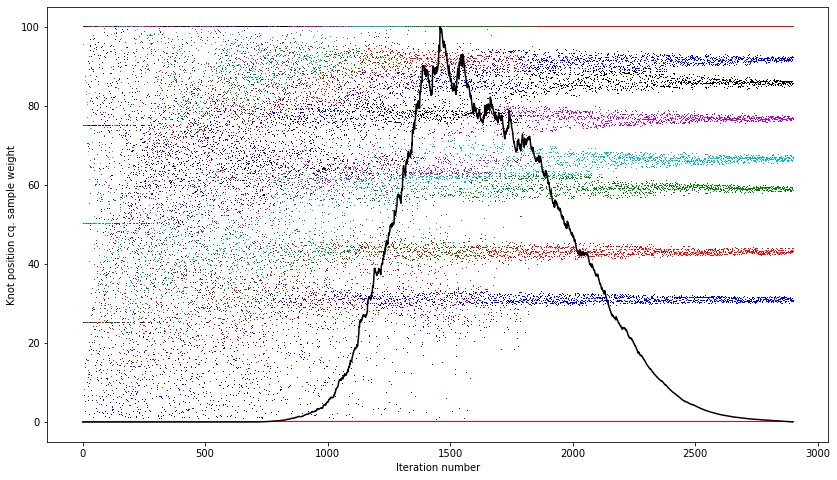

In [7]:
## Plot the evolutie of knots and sample weights
cc = ['k,', 'b,', 'r,', 'g,', 'c,', 'm,']
sl = ns.samples
ka = numpy.zeros( ( mxk, len( sl ) ), dtype=float )
plt.figure( 1, figsize=[14,8] )
for k,s in enumerate( sl ) :
    n = len( s.model.knots )
    ka[:n,k] = s.model.knots
for j in range( mxk ) :
    plt.plot( ka[j,:], cc[j%6] )
wgts = sl.getWeightEvolution()
mw = max( wgts )
plt.plot( 100 * wgts / mw, 'k-' )
plt.xlabel( "Iteration number" )
plt.ylabel( "Knot position cq. sample weight")
plt.show()

